### Importing all the required libraries.

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dropout
from __future__ import print_function
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import sys
import cv2
import seaborn as sns
import random 
import pickle

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Devices Availability.

In [2]:
devices = [ 'CPU', 'GPU']
for device in devices:
    if len(tf.config.list_logical_devices(device)) > 0:
        print('{} is available'.format((device)))
    else:
        print('{} is not available'.format(device))

CPU is available
GPU is not available


### Reading the excel file

In [3]:
labels = pd.read_excel(f"file_data-2.xlsx", dtype='string')
labels.head()

,file label,file,label
0,0,000000,0
1,1,000001,0
2,2,000002,0
3,3,000003,0
4,4,000004,0


In [4]:
labels['label'].value_counts()

0    3450
2     394
3     262
1     243
Name: label, dtype: Int64

In [5]:
labels.values

array([['0', '000000', '0'],
       ['1', '000001', '0'],
       ['2', '000002', '0'],
       ...,
       ['4346', '004346', '3'],
       ['4347', '004347', '3'],
       ['4348', '004348', '3']], dtype=object)

### Classify images of different classes into different directories.

In [6]:
## Create separate directory
train_dir = r"/Users/abhishekregmi/Desktop/Sandeep HW/imgs1/"
DR = r"/Users/abhishekregmi/Desktop/Sandeep HW/New_images/"

if not os.path.exists(DR):
    os.mkdir(DR)

for sequence, file_name, target in labels.values:
    ## Create subdirectory with 'class_name (labels)'
    if not os.path.exists(DR + str(target)):
        os.mkdir(DR + str(target))
    src_path = str(train_dir) + '/' + str(file_name) + '.bmp'
    destination_path = str(DR) + str(target) + '/' + str(file_name) + '.bmp'
    try:
        shutil.copy(src_path, destination_path)
        print("Successfull")
    except IOError as e:
        print("Unable to copy file {} to {}".format(src_path, destination_path))
    except:
        print("When try copy file {} to {}, unexpected error: {}").format(src_path, destination_path, sys.exc_info())

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Successfull
Succ

In [7]:
from PIL import Image
import PIL

In [8]:
training_data = []
CATEGORIES = ['0', '1', '2', '3']
DATADIR = '/Users/abhishekregmi/Desktop/Sandeep HW/New_images'
IMAGE_SIZE = 100

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)  # gives index values of category
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_image_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                new_image_array = new_image_array.reshape(IMAGE_SIZE, IMAGE_SIZE, 3)
                training_data.append([new_image_array, class_num])
            except Exception as e:
                pass
create_training_data()


In [9]:
print(len(training_data))

4349


In [10]:
training_data

[[array([[[10, 10, 10],
          [ 7,  7,  7],
          [ 5,  5,  5],
          ...,
          [ 6,  6,  6],
          [ 7,  7,  7],
          [12, 12, 12]],
  
         [[12, 12, 12],
          [ 6,  6,  6],
          [ 6,  6,  6],
          ...,
          [ 8,  8,  8],
          [ 8,  8,  8],
          [13, 13, 13]],
  
         [[15, 15, 15],
          [ 8,  8,  8],
          [ 7,  7,  7],
          ...,
          [ 6,  6,  6],
          [10, 10, 10],
          [12, 12, 12]],
  
         ...,
  
         [[12, 12, 12],
          [ 7,  7,  7],
          [ 5,  5,  5],
          ...,
          [ 9,  9,  9],
          [15, 15, 15],
          [19, 19, 19]],
  
         [[12, 12, 12],
          [ 7,  7,  7],
          [ 6,  6,  6],
          ...,
          [ 8,  8,  8],
          [13, 13, 13],
          [18, 18, 18]],
  
         [[12, 12, 12],
          [ 7,  7,  7],
          [ 5,  5,  5],
          ...,
          [ 7,  7,  7],
          [ 9,  9,  9],
          [20, 20, 20]]], dtype=u

### Shuffling training data 

In [11]:
random.shuffle(training_data)
for sample in training_data:
    print(sample[1])

3
2
2
0
2
0
0
1
2
3
0
0
0
0
0
0
0
1
2
0
0
0
0
2
0
1
2
3
2
2
2
0
0
0
0
0
3
0
0
3
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
0
0
0
3
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
3
3
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
1
0
0
1
3
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
3
3
0
0
0
1
0
0
0
0
0
0
3
0
2
0
2
0
0
1
2
0
0
2
3
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
3
0
0
1
0
0
0
0
0
0
0
0
3
2
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
2
0
0
0
1
0
0
3
2
0
1
0
0
3
0
0
0
0
0
0
1
0
3
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
0
2
0
0
3
3
2
0
1
0
2
0
0
0
0
0
0
0
2
2
0
0
0
0
0
2
0
0
0
2
0
0
0
0
0
2
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
3
0
0
0
0
3
1
0
0
0
2
0
0
0
0
0
3
1
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
0
0
2
3
0
0
0
0
0
0
0
3
0
0
0
0
0
1
0
0
3
0
0
0
0
0
2
3
0
0
0
0
0
0
3
0
2
0
0
0
0
2
0
2
0
0
0
0
0
1
3
0
3
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
2
0
0
2
0
0
2
0
0
0
0
0
0
0
1
0
0
1
0


### Convert features_list into numpy array

In [12]:
X = []
y = []
for features, label_ in training_data:
    X.append(features)
    y.append(label_)
print(X)
X = np.array(X)
y = np.array(y)
X.shape

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(4349, 100, 100, 3)

In [13]:
len(X)

4349

In [14]:
y

array([3, 2, 2, ..., 0, 0, 0])

In [15]:
np.unique(y)

array([0, 1, 2, 3])

### Dumping the features and target into pickle file. (AKA Pickling)

In [16]:
pickle_new = open("X.pickle", 'wb')
pickle.dump(X, pickle_new)
pickle_new.close()

pickle_new = open("y.pickle", 'wb')
pickle.dump(y, pickle_new)
pickle_new.close()

### Load features and targets from pickle file

In [17]:
import pickle

In [18]:
X = pickle.load(open("X.pickle", 'rb'))
y = pickle.load(open("y.pickle", 'rb'))

### Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

### Scaling the image pixel to (0,1), MinMax Scaling

In [72]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [73]:
X_train, X_test, X_val = X_train/255., X_test/255., X_val/255.

In [74]:
X_train.shape

(2956, 100, 100, 3)

In [75]:
from tensorflow.keras.utils import to_categorical

In [76]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)

In [77]:
y_train.shape

(2956,)

In [78]:
# plt.imshow(X_train[:,1])
# plt.axis("off")

In [79]:
X_train.shape, X_test.shape, X_val.shape

((2956, 100, 100, 3), (653, 100, 100, 3), (740, 100, 100, 3))

### VGG-19

In [80]:
from tensorflow.keras.applications import VGG16

In [81]:
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape= (100,100,3))
print("Model Loaded")

Model Loaded


In [82]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [83]:
for layers in pretrained_model.layers:
    layers.trainable = False
    print(f"{layers.name}: {layers.trainable}")

input_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: False
block5_conv2: False
block5_conv3: False
block5_pool: False


In [84]:
from tensorflow.keras.models import Model

In [85]:
new_model = tf.keras.models.Sequential(pretrained_model.layers)
new_model.add(Flatten())
new_model.add(Dense(300, activation = 'relu'))
new_model.add(Dense(100, activation = 'relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(4, activation = 'softmax'))
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)      

In [86]:
OPTIMIZER = tf.optimizers.Adam()
LOSS = tf.losses.sparse_categorical_crossentropy
METRICS = ['accuracy']
new_model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)

In [87]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
# train_datagen = ImageDataGenerator(
#     preprocessing_function= preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# 

In [89]:
# test_datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# 


In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint
current_dir = os.getcwd()

In [111]:
model_checkpoint = ModelCheckpoint(
    current_dir,
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = False,
    save_freq = 93,
)

In [112]:
n_batch_size = 32
n_epochs = 50

history = new_model.fit(X_train, 
                        y_train, 
                        batch_size = n_batch_size,
                        epochs = n_epochs,
                        validation_data=(X_val, y_val),
                       callbacks= model_checkpoint)

Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.8417
Epoch 00001: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 62s 673ms/step - loss: 0.5106 - accuracy: 0.8417 - val_loss: 0.5256 - val_accuracy: 0.8392
Epoch 2/50
93/93 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.8427
Epoch 00002: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 65s 696ms/step - loss: 0.5113 - accuracy: 0.8427 - val_loss: 0.5279 - val_accuracy: 0.8270
Epoch 3/50
93/93 [==============================] - ETA: 0s - loss: 0.4793 - accuracy: 0.8528
Epoch 00003: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
9

Epoch 23/50
93/93 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8792
Epoch 00023: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 66s 706ms/step - loss: 0.3521 - accuracy: 0.8792 - val_loss: 0.4416 - val_accuracy: 0.8459
Epoch 24/50
93/93 [==============================] - ETA: 0s - loss: 0.3628 - accuracy: 0.8735
Epoch 00024: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 66s 712ms/step - loss: 0.3628 - accuracy: 0.8735 - val_loss: 0.4317 - val_accuracy: 0.8568
Epoch 25/50
93/93 [==============================] - ETA: 0s - loss: 0.3713 - accuracy: 0.8718
Epoch 00025: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/asset

Epoch 45/50
93/93 [==============================] - ETA: 0s - loss: 0.3252 - accuracy: 0.8972
Epoch 00045: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 89s 956ms/step - loss: 0.3252 - accuracy: 0.8972 - val_loss: 0.3979 - val_accuracy: 0.8608
Epoch 46/50
93/93 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.8995
Epoch 00046: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/assets
93/93 [==============================] - 71s 761ms/step - loss: 0.2924 - accuracy: 0.8995 - val_loss: 0.4029 - val_accuracy: 0.8757
Epoch 47/50
93/93 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.9026
Epoch 00047: saving model to /Users/abhishekregmi/Desktop/Sandeep HW
INFO:tensorflow:Assets written to: /Users/abhishekregmi/Desktop/Sandeep HW/asset

In [113]:
new_model.evaluate(X_test, y_test)

21/21 [==============================] - 11s 506ms/step - loss: 0.4042 - accuracy: 0.8622


[0.40424129366874695, 0.8621745705604553]

In [114]:
tf.keras.models.save_model(new_model, "model.h5")

In [115]:
prediction = new_model.predict(X_test)
prediction

array([[8.93183410e-01, 2.23797251e-05, 6.81195699e-04, 1.06113024e-01],
       [9.39949334e-01, 1.25996280e-06, 2.08822340e-02, 3.91672254e-02],
       [1.45197898e-01, 7.36808829e-07, 8.44965160e-01, 9.83618945e-03],
       ...,
       [8.85743856e-01, 6.45659456e-05, 3.45968865e-02, 7.95947015e-02],
       [6.99907959e-01, 2.81509006e-06, 2.66874462e-01, 3.32147256e-02],
       [8.51480186e-01, 7.57055604e-05, 3.63602652e-04, 1.48080498e-01]],
      dtype=float32)

In [95]:
prediction[0]

array([0.9032886 , 0.01373319, 0.03756212, 0.04541601], dtype=float32)

In [116]:
y_hat = np.argmax(prediction, axis=-1) 

In [117]:
y_hat

array([0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
confusion_matrix(y_test, y_hat)

array([[494,   0,  19,   5],
       [  2,  35,   0,   4],
       [ 15,   0,  31,   0],
       [ 42,   2,   1,   3]])

<AxesSubplot:>

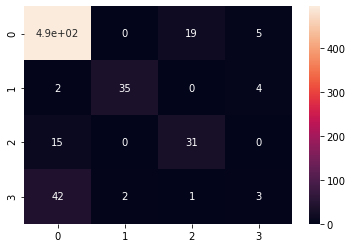

In [120]:
sns.heatmap(confusion_matrix(y_test, y_hat), annot= True)

In [121]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       518
           1       0.95      0.85      0.90        41
           2       0.61      0.67      0.64        46
           3       0.25      0.06      0.10        48

    accuracy                           0.86       653
   macro avg       0.67      0.64      0.64       653
weighted avg       0.83      0.86      0.84       653

